In [ ]:
!pip install torch torchvision matplotlib
!pip install git+https://github.com/qubvel/segmentation_models
!pip install segmentation-models-pytorch
!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install --upgrade opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-uz4_oo60
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models /tmp/pip-req-build-uz4_oo60
  Resolved https://github.com/qubvel/segmentation_models to commit e951c6747f75fa9e7240816d1c79dd2e66813123
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 KB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 7.9 MB/s eta 0:

In [ ]:
!git clone https://github.com/AJITKUMAR130012/Computer-vision.git

Cloning into 'Computer-vision'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (242/242), done.
remote: Total 265 (delta 19), reused 250 (delta 13), pack-reused 0
Receiving objects: 100% (265/265), 12.57 MiB | 19.09 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
import torch
from torchvision import transforms
from PIL import Image
from efficientnet_pytorch import EfficientNet

# Load the pre-trained model

model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
                       in_channels=3, out_channels=1, init_features=32, pretrained=True)
model.eval()


Using cache found in /root/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


UNet(
  (encoder1): Sequential(
    (enc1conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1relu1): ReLU(inplace=True)
    (enc1conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1relu2): ReLU(inplace=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (encoder2): Sequential(
    (enc2conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc2relu1): ReLU(inplace=True)
    (enc2conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

torch.Size([1, 3, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([256, 256, 1])


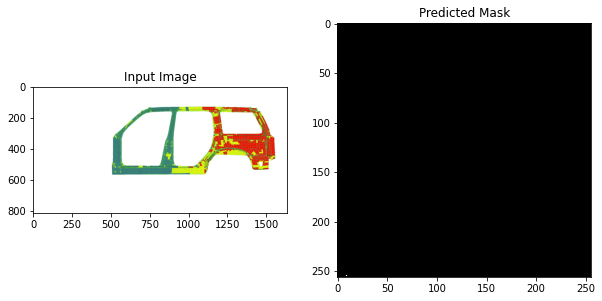

In [ ]:
# Load the test image
image = Image.open('/content/faulty2.png')

# Convert the image to a tensor and normalize it
transform = transforms.Compose([
    transforms.Resize((256,256)),
    #transforms.CenterCrop(256),
    transforms.ToTensor(),
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
image_tensor = transform(image)
image_tensor = image_tensor.unsqueeze(0)
print(image_tensor.shape)
# Make predictions
with torch.no_grad():
    outputs = model(image_tensor)
    print(outputs.shape)
    predicted_mask = torch.sigmoid(outputs).squeeze(0)
predicted_mask=predicted_mask.permute(2,1,0)
print(predicted_mask.shape)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].imshow(image)
ax[0].set_title('Input Image')

ax[1].imshow(predicted_mask, cmap='gray')
ax[1].set_title('Predicted Mask')

plt.show()

torch.Size([256, 256, 1])


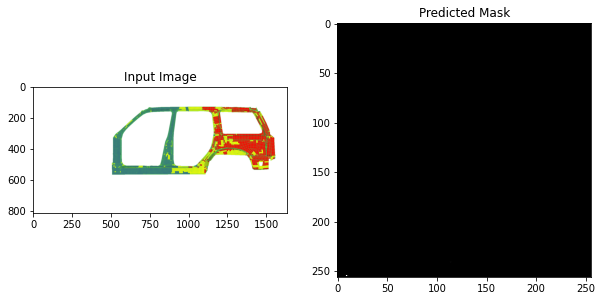

In [ ]:
# Load the test image
image = Image.open('/content/faulty1.png')

# Convert the image to a tensor and normalize it
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
image_tensor = transform(image)
image_tensor = image_tensor.unsqueeze(0)
# Make predictions
with torch.no_grad():
    outputs = model(image_tensor)
    predicted_mask = torch.sigmoid(outputs).squeeze(0)
predicted_mask=predicted_mask.permute(2,1,0)
print(predicted_mask.shape)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].imshow(image)
ax[0].set_title('Input Image')

ax[1].imshow(predicted_mask, cmap='gray')
ax[1].set_title('Predicted Mask')

plt.show()

torch.Size([256, 256, 1])


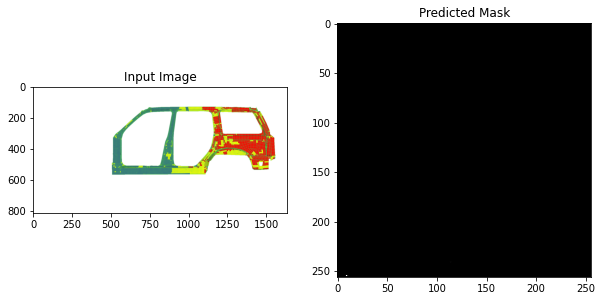

In [ ]:
# Load the test image
image = Image.open('/content/perfect1.png')

# Convert the image to a tensor and normalize it
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
image_tensor = transform(image)
image_tensor = image_tensor.unsqueeze(0)
# Make predictions
with torch.no_grad():
    outputs = model(image_tensor)
    predicted_mask = torch.sigmoid(outputs).squeeze(0)
predicted_mask=predicted_mask.permute(2,1,0)
print(predicted_mask.shape)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].imshow(image)
ax[0].set_title('Input Image')

ax[1].imshow(predicted_mask, cmap='gray')
ax[1].set_title('Predicted Mask')

plt.show()

torch.Size([256, 256, 1])


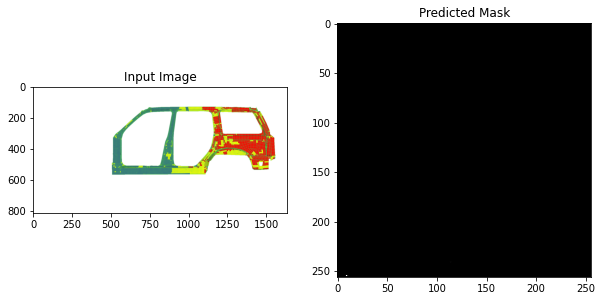

In [ ]:
# Load the test image
image = Image.open('/content/perfect1.png')

# Convert the image to a tensor and normalize it
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
image_tensor = transform(image)
image_tensor = image_tensor.unsqueeze(0)
# Make predictions
with torch.no_grad():
    outputs = model(image_tensor)
    predicted_mask = torch.sigmoid(outputs).squeeze(0)
predicted_mask=predicted_mask.permute(2,1,0)
print(predicted_mask.shape)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].imshow(image)
ax[0].set_title('Input Image')

ax[1].imshow(predicted_mask, cmap='gray')
ax[1].set_title('Predicted Mask')

plt.show()